## DATA ANALYSIS

16th March

The goal of this notebook is creating a CNN to analyse previously produced data.

### Packages

In [6]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import initializers, regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D


## DATA renormalization

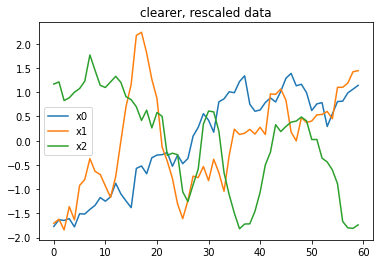

[1. 0. 0.]
10000 8000 2000 60


In [7]:
str0 = 'ts_L60_Z12_A500_DX50_bias5_N10000'
fnamex = 'DATA/x_'+str0+'.csv'
fnamey = 'DATA/y_'+str0+'.csv'

x = np.loadtxt(fnamex, delimiter = ',', dtype = float)
N = len(x)

xm = x.mean(axis = 1)
stdx = x.std(axis = 1)
for n in range(N):
    x[n] -= xm[n]
    x[n] /= stdx[n]
    
plt.plot(x[0], label='x0')
plt.plot(x[1], label='x1')
plt.plot(x[2], label='x2')
plt.title('clearer, rescaled data')
plt.legend()
plt.show()    


categ = np.loadtxt(fnamey, delimiter = ',', dtype = int)
N_categ = np.max(categ)+1
y = np.zeros((N,N_categ))
for n in range(N):
    y[n][categ[n]] = 1             #one-hot encoding
print(y[0])


perc_train = 0.8                    
N_train = int(N*perc_train)
N_val = N - N_train

x_train, y_train = x[:N_train], y[:N_train]
x_val, y_val = x[N_train:], y[N_train:]

L = len(x[0])
print(N,N_train, N_val,L)


x_train = x_train.reshape(x_train.shape[0],L,1)    #reshaping
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

In [8]:
reg = regularizers.l2(0.01)    #LASSO, lambda = 10e-4
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = Sequential()
model.add(Conv1D(                                       #First layer:
                filters = 5,
                kernel_size = 11,                       #like Z = 12
                kernel_regularizer = reg,
                kernel_initializer = ini,
                activation = 'relu',
                input_shape = input_shape
                ))
model.add(AveragePooling1D(5))                          #Reduce 5 -> 1

model.add(Conv1D(                                       #Second layer
                filters = 5,
                kernel_size = 7,
                activation = 'relu'
                ))
model.add(Flatten())                                      #Move to GNN
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(N_categ,activation = 'softmax'))

print(model.summary())   #Notice how few parameters!

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_1 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 5)              180       
_________________________________________________________________
flatten_1 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [9]:

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)

model.compile(loss = tensorflow.keras.losses.categorical_crossentropy,
              optimizer = 'adam', metrics = ['accuracy'])

#after a compilation of the network we save in 'initial.h5' the weight at the beginning
model.save_weights('initial.h5')

In [10]:
batch_size = 250
epochs = 100
fit = model.fit(x_train,
                y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data = (x_val,y_val),
                verbose = 2
               )

Epoch 1/100
32/32 [==============================] - 1s 28ms/step - loss: 1.0991 - accuracy: 0.3348 - val_loss: 1.0948 - val_accuracy: 0.3760
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0920 - accuracy: 0.3922 - val_loss: 1.0845 - val_accuracy: 0.4325
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0810 - accuracy: 0.4193 - val_loss: 1.0705 - val_accuracy: 0.4440
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0648 - accuracy: 0.4363 - val_loss: 1.0497 - val_accuracy: 0.4775
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0423 - accuracy: 0.4662 - val_loss: 1.0256 - val_accuracy: 0.5090
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 1.0259 - accuracy: 0.4924 - val_loss: 1.0017 - val_accuracy: 0.5335
Epoch 7/100
32/32 [==============================] - 0s 9ms/step - loss: 1.0059 - accuracy: 0.5031 - val_loss: 0.9826 - val_accuracy: 0.5530
Epoch 8/100


32/32 [==============================] - 0s 6ms/step - loss: 0.6031 - accuracy: 0.7756 - val_loss: 0.5629 - val_accuracy: 0.7890
Epoch 59/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5947 - accuracy: 0.7799 - val_loss: 0.5567 - val_accuracy: 0.7915
Epoch 60/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5827 - accuracy: 0.7819 - val_loss: 0.5547 - val_accuracy: 0.7910
Epoch 61/100
32/32 [==============================] - 0s 8ms/step - loss: 0.5870 - accuracy: 0.7752 - val_loss: 0.5509 - val_accuracy: 0.7960
Epoch 62/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5908 - accuracy: 0.7842 - val_loss: 0.5489 - val_accuracy: 0.7950
Epoch 63/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5690 - accuracy: 0.7917 - val_loss: 0.5463 - val_accuracy: 0.7950
Epoch 64/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5787 - accuracy: 0.7838 - val_loss: 0.5420 - val_accuracy: 0.7975
Epoch 65/100
32/32 

As we can see now the performance are really better!

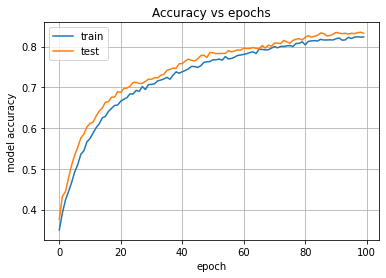

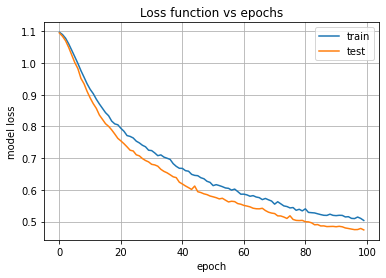

In [11]:
#Plot

# accuracy
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Accuracy vs epochs')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
plt.show()
# loss
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Loss function vs epochs')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
plt.show()

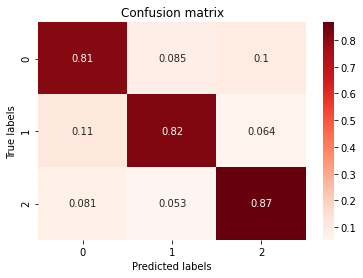

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_val  = model.predict(x_val)
#take the class with the highest probability from the val predictions
max_y_pred_val = np.argmax(y_pred_val, axis=1)
max_y_val = np.argmax(y_val, axis=1)
confusion_Oz = confusion_matrix(max_y_pred_val,max_y_val, normalize='true') 
sns.heatmap(confusion_Oz, annot = True, cmap = plt.cm.Reds, fmt = '.2g')

plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.title('Confusion matrix')
plt.show()

 67%|██████▋   | 10/15 [02:34<01:17, 15.45s/it]


OSError: DATA/x_ts_L60_Z12_A550_DX50_bias5_N10000.csv not found.

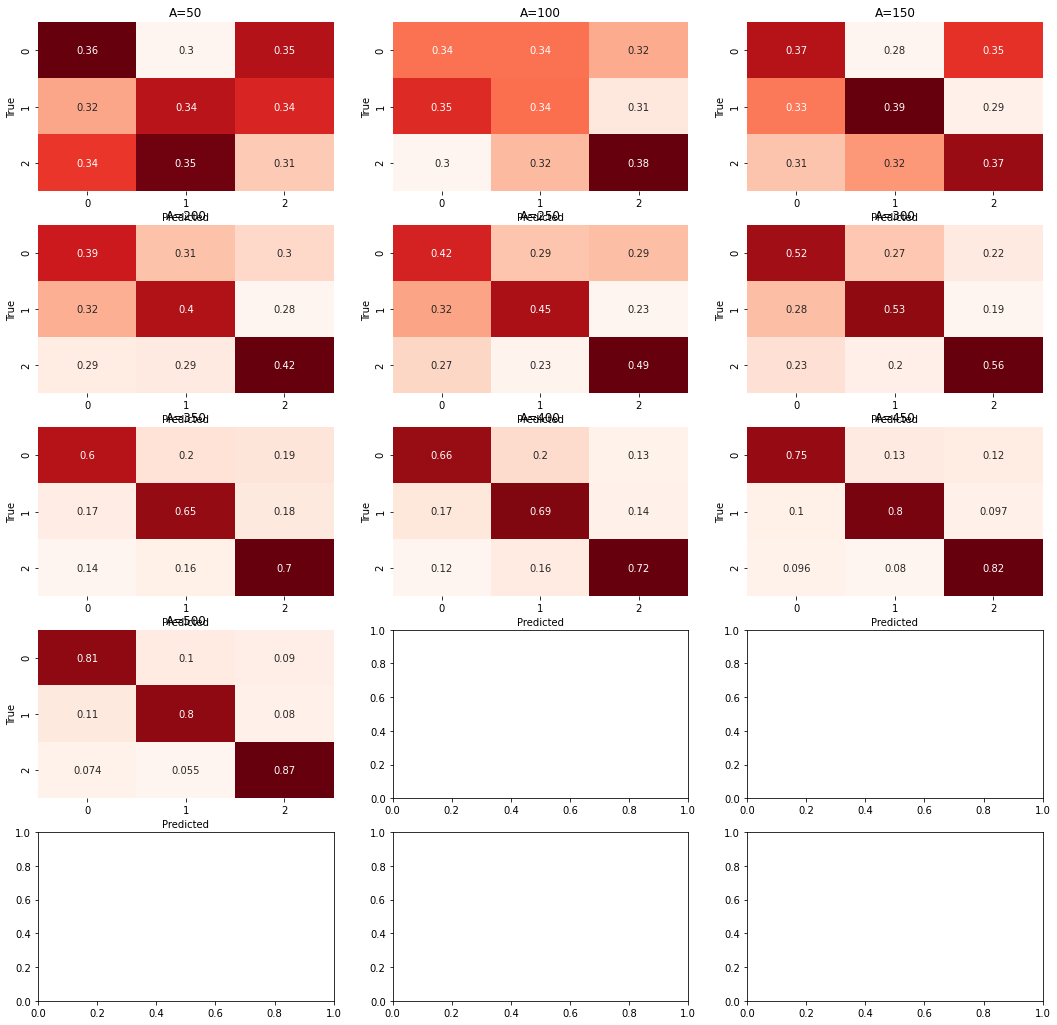

In [46]:
from tqdm import tqdm

fig, ax = plt.subplots(5, 3, figsize=(18,18))
As = np.arange(50,550,50)
scores = {}

for a in tqdm(range(len((As)))):
    
    #if statements to define the grid for the subplots
    if a < 3:
        i = 0
        j = a
    elif a < 6:
        i = 1
        j = a-3
    elif a < 9:
        i = 2
        j = a-6
    elif a < 12:
        i = 3
        j = a-9
    elif a < 15:
        i = 4
        j = a-12
    
    str0 = f'ts_L60_Z12_A{As[a]}_DX50_bias5_N10000'
    fnamex = 'DATA/x_'+str0+'.csv'
    fnamey = 'DATA/y_'+str0+'.csv'
    
    x = np.loadtxt(fnamex, delimiter = ',', dtype = float)
    N = len(x)

    xm = x.mean(axis = 1)
    stdx = x.std(axis = 1)
    for n in range(N):
        x[n] -= xm[n]
        x[n] /= stdx[n]

    categ = np.loadtxt(fnamey, delimiter = ',', dtype = int)
    N_categ = np.max(categ)+1
    y = np.zeros((N,N_categ))
    for n in range(N):
        y[n][categ[n]] = 1             

    perc_train = 0.8                    
    N_train = int(N*perc_train)
    N_val = N - N_train

    x_train, y_train = x[:N_train], y[:N_train]
    x_val, y_val = x[N_train:], y[N_train:]

    L = len(x[0])

    x_train = x_train.reshape(x_train.shape[0],L,1)   
    x_val = x_val.reshape(x_val.shape[0],L,1)
    input_shape = (L,1)
    
    #at each step of the for loop we recover the initial weights in order to start always from the same model
    model.load_weights('initial.h5')
    fit = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs, 
                    validation_data = (x_val,y_val),
                    verbose = 0
                   )
    scores[As[a]] = np.mean(fit.history['accuracy'][-20:])
    
    y_pred_val  = model.predict(x_val)
    max_y_pred_val = np.argmax(y_pred_val, axis=1)
    max_y_val = np.argmax(y_val, axis=1)
    confusion_Oz = confusion_matrix(max_y_pred_val,max_y_val, normalize='true') 
 
    g = sns.heatmap(confusion_Oz,
                    annot = True,
                    cmap = plt.cm.Reds,
                    cbar = False,
                    fmt = '.2g',
                    ax = ax[i][j]
                   )
    g.set_ylabel('True')
    g.set_xlabel('Predicted')
    g.set_title(f'A={As[a]}')

plt.show()
print(scores)   

In [ ]:
keys_int = []
as_accuracy = []
for k in scores.keys():
    keys_int.append(k)
    as_accuracy.append(scores.get(k))
plt.title('Accuracy vs Signal Amplitude')
plt.xlabel('Signal Amplitude [a.u.]')
plt.xlabel('Accuracy [a.u.]')
plt.plot(keys_int, as_accuracy, '-o')
plt.show()

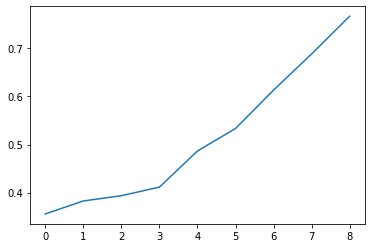

In [34]:
plt.plot(keys_int, as_accuracy)

In [13]:
!mkdir MODEL
fname ='MODEL/model'+str0+'.h5'
model.save(fname, save_format='h5')

model2 = keras.models.load_model(fname)
yhat_val = np.argmax(model2.predict(x_val), axis=-1)
ytrue_val = np.argmax(y_val, axis=-1)

for n in range(20):
    print(y_val[n], ytrue_val[n], yhat_val[n])

[0. 0. 1.] 2 2
[1. 0. 0.] 0 2
[0. 1. 0.] 1 1
[0. 0. 1.] 2 1
[1. 0. 0.] 0 0
[0. 1. 0.] 1 1
[0. 0. 1.] 2 2
[1. 0. 0.] 0 0
[0. 1. 0.] 1 1
[0. 0. 1.] 2 0
[1. 0. 0.] 0 1
[0. 1. 0.] 1 1
[0. 0. 1.] 2 0
[1. 0. 0.] 0 1
[0. 1. 0.] 1 1
[0. 0. 1.] 2 2
[1. 0. 0.] 0 1
[0. 1. 0.] 1 1
[0. 0. 1.] 2 2
[1. 0. 0.] 0 2
